In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
file_path = './calculated_data/15m_data_cleaned.csv'

In [26]:
df = pd.read_csv(file_path)
print(df.columns)


Index(['Unnamed: 0', 'Station', 'Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)',
       'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)',
       'CO (mg/m³)', 'Ozone (µg/m³)', 'Checks', 'AQI_calculated',
       'AQI_bucket_calculated'],
      dtype='object')


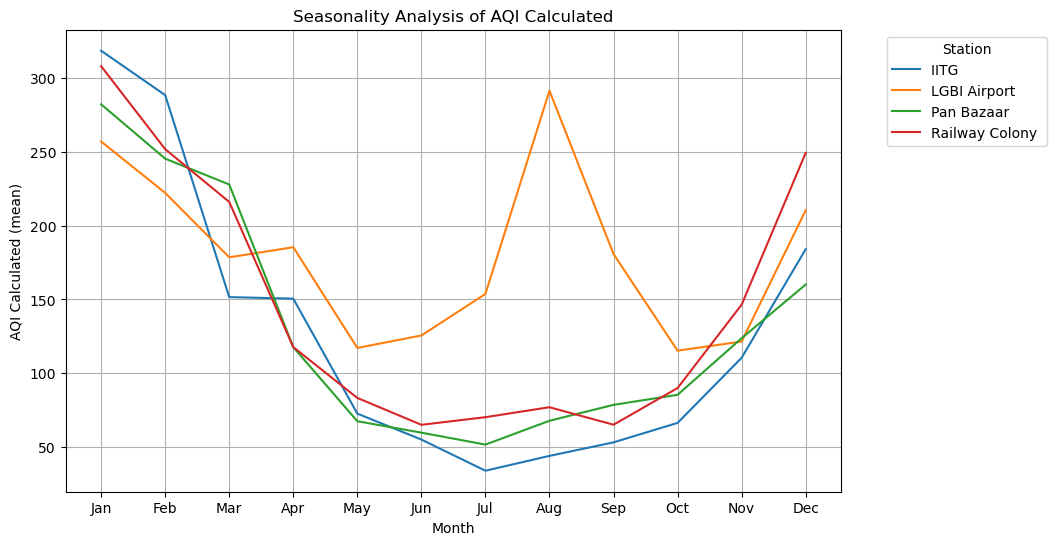

In [27]:
df_filtered = df[['Station', 'Timestamp', 'AQI_calculated']].copy()
df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'])
df_filtered['Month'] = df_filtered['Timestamp'].dt.month
grouped_data = df_filtered.groupby(['Station', 'Month'])

seasonality_analysis = grouped_data['AQI_calculated'].mean().unstack()

plt.figure(figsize=(10, 6))
for station in seasonality_analysis.index:
    plt.plot(seasonality_analysis.columns, seasonality_analysis.loc[station], label=station)

plt.title('Seasonality Analysis of AQI Calculated')
plt.xlabel('Month')
plt.ylabel('AQI Calculated (mean)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

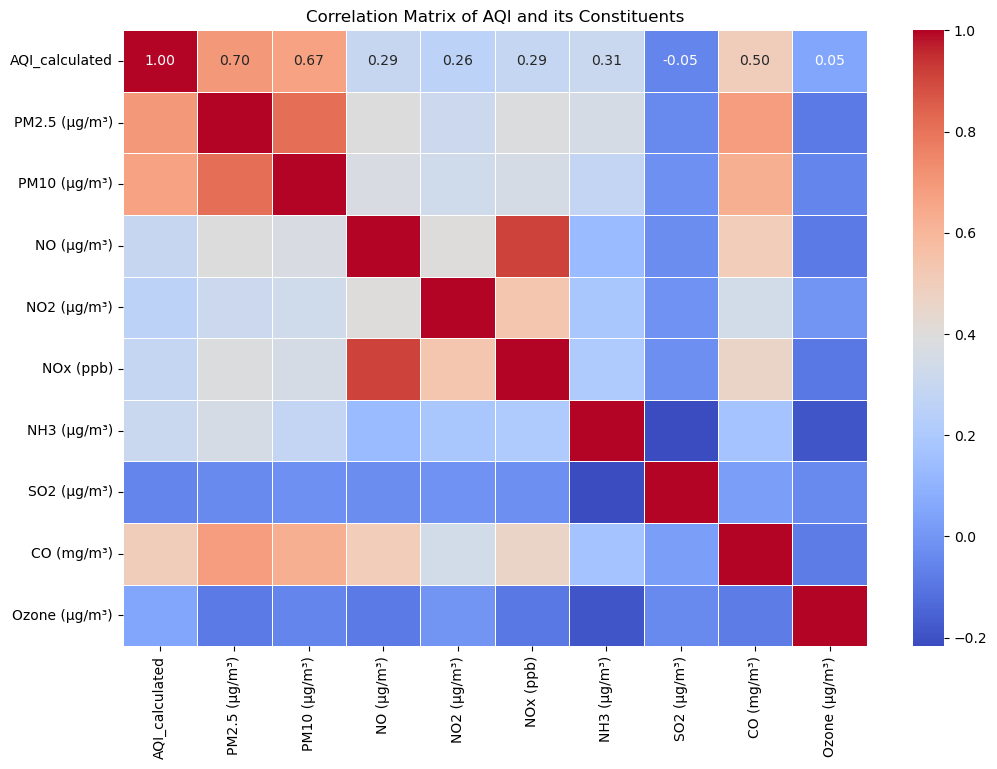

In [28]:
columns_of_interest = ['AQI_calculated', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)',
                       'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)',
                       'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
                       'Ozone (µg/m³)']

df_filtered = df[columns_of_interest]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of AQI and its Constituents')
plt.show()


In [29]:
df_filtered.head()

,AQI_calculated,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,67.0,46.00,80.00,1.29,9.16,12.02,27.19,13.56,0.40,15.80
1,68.0,46.00,80.00,1.74,8.93,12.48,30.29,13.71,0.41,15.52
2,68.0,45.62,79.92,1.87,8.56,12.17,28.20,13.88,0.41,15.33
3,68.0,41.00,72.92,1.83,8.72,12.37,26.69,13.77,0.40,15.30
4,68.0,41.00,79.00,1.69,7.91,11.30,26.83,13.87,0.41,15.49


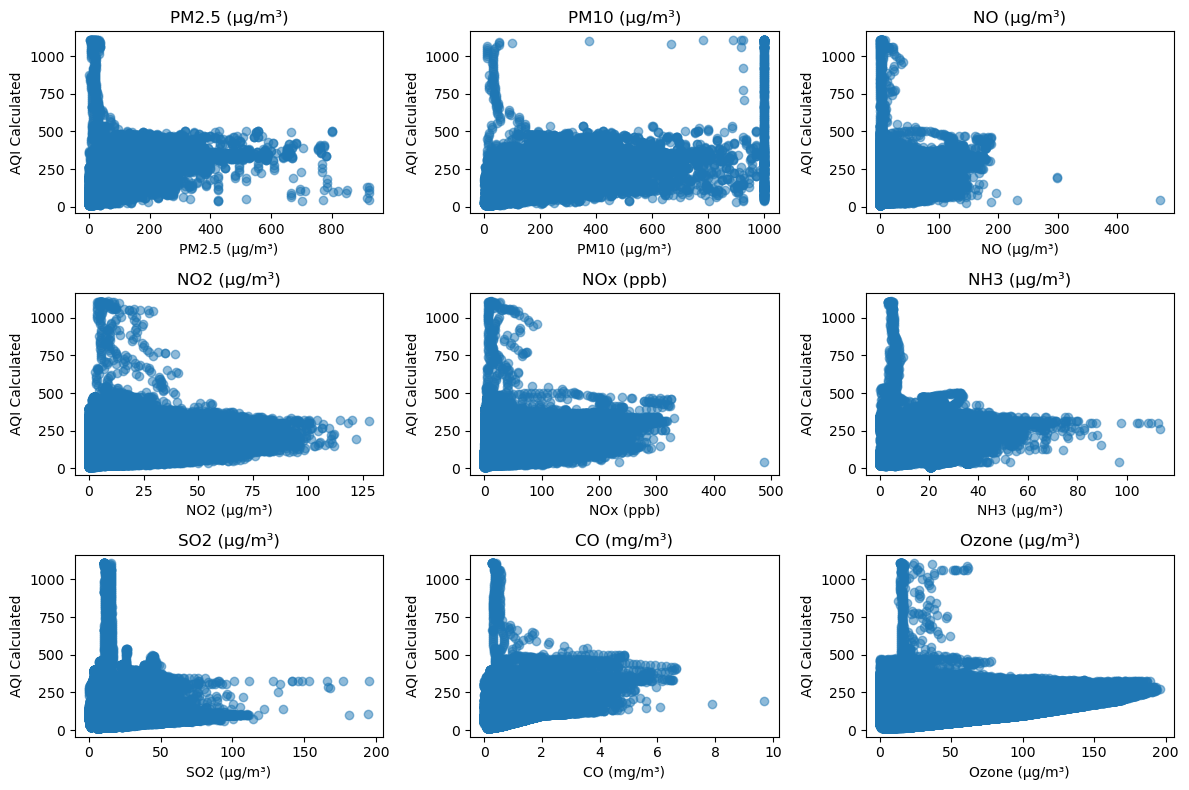

In [24]:
plt.figure(figsize=(12, 8))
for i, constituent in enumerate(columns_of_interest[1:], start=1):
    plt.subplot(3, 3, i)
    plt.scatter(df_filtered[constituent], df_filtered['AQI_calculated'], alpha=0.5)
    plt.title(constituent)
    plt.xlabel(constituent)
    plt.ylabel('AQI Calculated')

plt.tight_layout()
plt.show()

DayofWeek                 0           1           2           3           4  \
Station                                                                       
IITG             112.587649  114.151190  108.213702  114.319351  110.309984   
LGBI Airport     178.466344  187.211882  169.716658  185.265162  178.292979   
Pan Bazaar       132.467581  126.333072  123.919261  120.891515  130.112716   
Railway Colony   150.678304  148.608942  141.647434  136.411601  145.611594   

DayofWeek                 5           6  
Station                                  
IITG             111.936494  112.119157  
LGBI Airport     182.264151  184.225852  
Pan Bazaar       131.789534  132.048461  
Railway Colony   150.203248  152.507307  


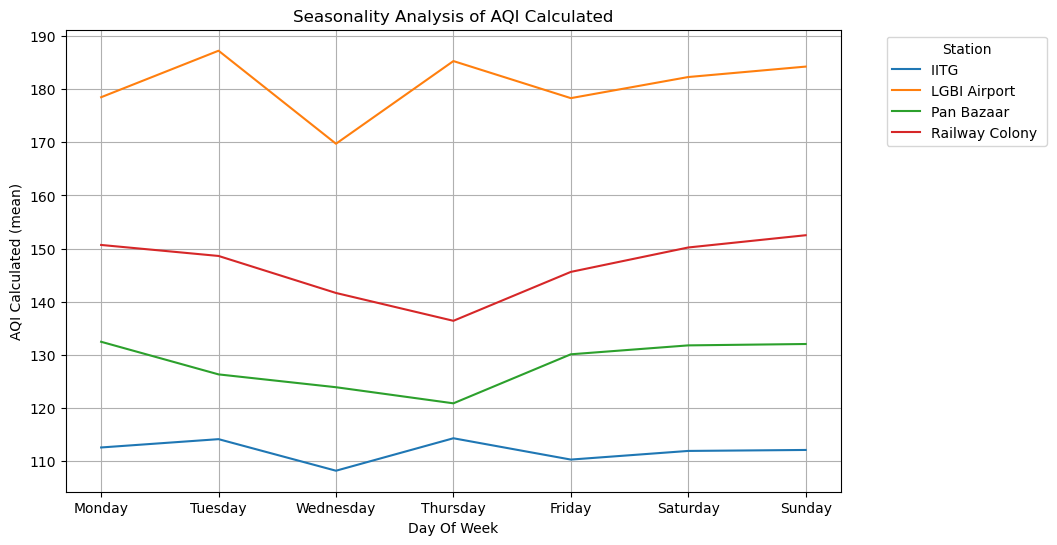

In [19]:
df_filtered = df[['Station', 'Timestamp', 'AQI_calculated']].copy()
df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'])
df_filtered['DayofWeek'] = df_filtered['Timestamp'].dt.dayofweek
grouped_data = df_filtered.groupby(['Station', 'DayofWeek'])

seasonality_analysis = grouped_data['AQI_calculated'].mean().unstack()

print(seasonality_analysis)

plt.figure(figsize=(10, 6))
for station in seasonality_analysis.index:
    plt.plot(seasonality_analysis.columns, seasonality_analysis.loc[station], label=station)

plt.title('Seasonality Analysis of AQI Calculated')
plt.xlabel('Day Of Week')
plt.ylabel('AQI Calculated (mean)')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
df_filtered = df[['Station', 'Timestamp', 'AQI_calculated']].copy()
df_filtered['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_filtered['Year'] = df_filtered['Timestamp'].dt.year
grouped_data = df_filtered.groupby(['Year', 'Station'])
for (year, station), data in grouped_data:
    plt.figure(figsize=(15, 6))
    plt.plot(data['Timestamp'], data['AQI_calculated'], label=station)
    plt.title(f'AQI Calculated Over the Years - {station}')
    plt.xlabel('Timestamp')
    plt.ylabel('AQI Calculated')
    plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
